<a href="https://colab.research.google.com/github/ashraful005/DS_ML_Bootcamp/blob/master/Fish_Disease_Detection_80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Install packages**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%%capture
!pip install torchmetrics
!pip install torchinfo

# **2. Import libraries**

In [ ]:
# Data handling
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

# Preprocessing
import cv2
from sklearn.model_selection import train_test_split as tts

# Torch
import torch
from torch import nn, optim
from torch.utils.data import Dataset, DataLoader
from torchinfo import summary
from torchmetrics.classification import MulticlassAccuracy
from torchvision.models import resnet50, ResNet50_Weights

# Metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report

# os
import os

# Path
from pathlib import Path

# tqdm
from tqdm.auto import tqdm

# typing
from typing import Dict, List

# Counter
from collections import Counter

# random
import random

# Warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ashraful005","key":"4f746c27dab22414e17a0f5a0fe3baca"}'}

In [ ]:
!pip install kaggle

In [ ]:
!mkdir ~/.kaggle

In [ ]:
!cp kaggle.json ~/.kaggle

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
pip install --upgrade kaggle


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.6/84.6 kB 2.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for kaggle: filename=kaggle-1.6.4-py3-none-any.whl size=111926 sha256=864cbb1cda1e00c94abd3272fa71423e4d7855fb1fbc72d1592da1abbf41ccfc
  Stored in directory: /root/.cache/pip/wheels/96/ea/6e/1ef402d5911f0536091cd6d9357682c64214efa960eab358b4
Successfully built kaggle
  Attempting uninstall: kaggle
    Found existing installation: kaggle 1.5.16
    Uninstalling kaggle-1.5.16:
      Successfully uninstalled kaggle-1.5.16


In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets list

ref                                                                title                                               size  lastUpdated          downloadCount  voteCount  usabilityRating  
-----------------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
nelgiriyewithana/apple-quality                                     Apple Quality                                      170KB  2024-01-11 14:31:07           6081        144  1.0              
hummaamqaasim/jobs-in-data                                         Jobs and Salaries in Data Science                   76KB  2023-12-25 20:03:32          12430        228  1.0              
emirhanai/city-happiness-index-2024                                City Happiness Index - 2024                          8KB  2024-01-22 00:41:50           1456         32  1.0              
shiivvvaam/revenue-of-top-companies-in-india      

In [ ]:
!kaggle datasets download 'subirbiswas19/freshwater-fish-disease-aquaculture-in-south-asia'

100% 10.6M/10.6M [00:00<00:00, 19.0MB/s]
100% 10.6M/10.6M [00:00<00:00, 12.8MB/s]


In [ ]:
!unzip freshwater-fish-disease-aquaculture-in-south-asia.zip

Archive:  freshwater-fish-disease-aquaculture-in-south-asia.zip
  inflating: SB-Fish-Disease.csv     
  inflating: SB-FishDisease/SB-FishDisease/Bacterial Red disease/Bacterial Red disease (1).jpeg  
  inflating: SB-FishDisease/SB-FishDisease/Bacterial Red disease/Bacterial Red disease (1).jpg  
  inflating: SB-FishDisease/SB-FishDisease/Bacterial Red disease/Bacterial Red disease (1).png  
  inflating: SB-FishDisease/SB-FishDisease/Bacterial Red disease/Bacterial Red disease (10).jpg  
  inflating: SB-FishDisease/SB-FishDisease/Bacterial Red disease/Bacterial Red disease (11).jpg  
  inflating: SB-FishDisease/SB-FishDisease/Bacterial Red disease/Bacterial Red disease (12).jpg  
  inflating: SB-FishDisease/SB-FishDisease/Bacterial Red disease/Bacterial Red disease (13).jpg  
  inflating: SB-FishDisease/SB-FishDisease/Bacterial Red disease/Bacterial Red disease (15).jpg  
  inflating: SB-FishDisease/SB-FishDisease/Bacterial Red disease/Bacterial Red disease (16).jpg  
  inflating: SB-Fi

In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv('SB-Fish-Disease.csv')

In [ ]:
df

Folder Name  \
0    Bacterial diseases - Aeromoniasis   
1    Bacterial diseases - Aeromoniasis   
2    Bacterial diseases - Aeromoniasis   
3    Bacterial diseases - Aeromoniasis   
4    Bacterial diseases - Aeromoniasis   
..                                 ...   
513  Viral diseases White tail disease   
514  Viral diseases White tail disease   
515  Viral diseases White tail disease   
516  Viral diseases White tail disease   
517  Viral diseases White tail disease   

                                 Image Filename  \
0    Bacterial diseases - Aeromoniasis (1).jpeg   
1     Bacterial diseases - Aeromoniasis (1).jpg   
2     Bacterial diseases - Aeromoniasis (1).png   
3    Bacterial diseases - Aeromoniasis (10).jpg   
4    Bacterial diseases - Aeromoniasis (11).jpg   
..                                          ...   
513   Viral diseases White tail disease (7).jpg   
514  Viral diseases White tail disease (8).jpeg   
515   Viral diseases White tail disease (8).jpg   
516  Viral diseases White tail disease (9).jpeg   
517   Viral diseases White tail disease (9).jpg   

                                            Image Path  
0    SB-FishDisease\Bacterial diseases - Aeromonias...  
1    SB-FishDisease\Bacterial diseases - Aeromonias...  
2    SB-FishDisease\Bacterial diseases - Aeromonias...  
3    SB-FishDisease\Bacterial diseases - Aeromonias...  
4    SB-FishDisease\Bacterial diseases - Aeromonias...  
..                                                 ...  
513  SB-FishDisease\Viral diseases White tail disea...  
514  SB-FishDisease\Viral diseases White tail disea...  
515  SB-FishDisease\Viral diseases White tail disea...  
516  SB-FishDisease\Viral diseases White tail disea...  
517  SB-FishDisease\Viral diseases White tail disea...  

[518 rows x 3 columns]

# **3. Load data and EDA**

In [ ]:
# Let's see how many images we have.
from pathlib import Path
IMAGE_PATH = Path("/content/SB-FishDisease/SB-FishDisease")

image_path_list_jpg = list(IMAGE_PATH.glob("*/*.jpg"))
image_path_list_jpeg = list(IMAGE_PATH.glob("*/*.jpeg"))
image_path_list_png = list(IMAGE_PATH.glob("*/*.png"))
image_path_list_JPG = list(IMAGE_PATH.glob("*/*.JPG"))
image_path_list_webp = list(IMAGE_PATH.glob("*/*.webp"))

TOTAL_IMAGE_PATH_LIST = image_path_list_jpg + image_path_list_jpeg + image_path_list_png\
                        + image_path_list_JPG + image_path_list_webp

print(f'Total Images = {len(TOTAL_IMAGE_PATH_LIST)}')

Total Images = 460


In [ ]:
# Let's visualize how many classes we have.
import os
classes = sorted(os.listdir(IMAGE_PATH))
classes

['Bacterial Red disease',
 'Bacterial diseases - Aeromoniasis',
 'Bacterial gill disease',
 'Fungal diseases Saprolegniasis',
 'Healthy Fish',
 'Parasitic diseases',
 'Viral diseases White tail disease']

In [ ]:
# Let's see how many images per class we have.
from collections import Counter
class_count = []
for i in TOTAL_IMAGE_PATH_LIST:
    class_count.append(i.parent.stem)

Counter(class_count)

Counter({'Bacterial Red disease': 48,
         'Fungal diseases Saprolegniasis': 46,
         'Bacterial diseases - Aeromoniasis': 49,
         'Viral diseases White tail disease': 44,
         'Healthy Fish': 177,
         'Bacterial gill disease': 58,
         'Parasitic diseases': 38})

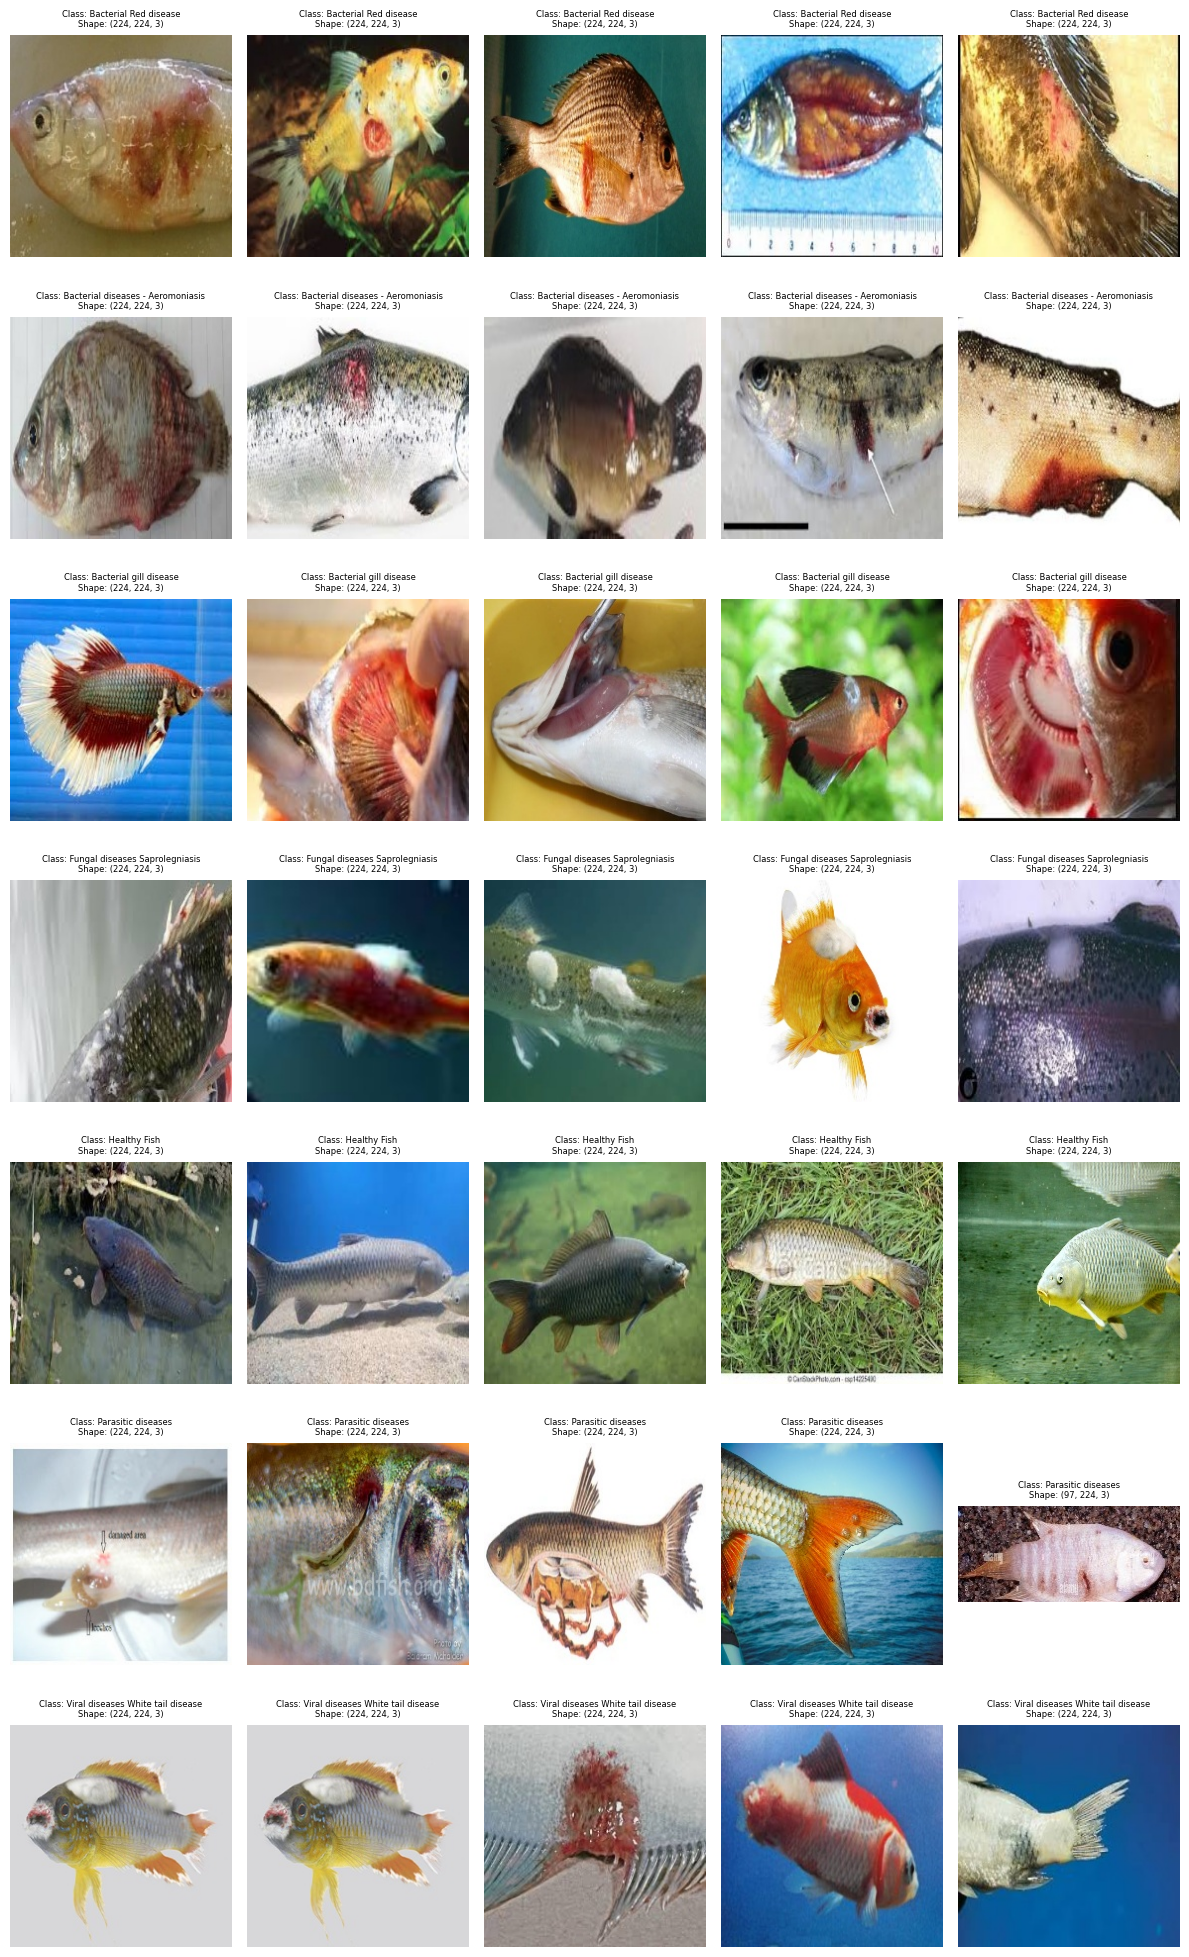

In [ ]:
# Let's visualize 5 images for each class.
import matplotlib.pyplot as plt
import random
import cv2

fig,ax = plt.subplots(nrows = 7, ncols = 5, figsize = (12,20))
p = 0
for c in classes:

    a = random.choices(list(Path(os.path.join(IMAGE_PATH, c)).glob("*.jpg")), k = 5)

    for i,j in enumerate(a):
        img_BGR = cv2.imread(str(j))
        img_RGB = cv2.cvtColor(img_BGR, cv2.COLOR_BGR2RGB)
        ax[p,i].imshow(img_RGB)
        ax[p,i].set_title(f'Class: {j.parent.stem}\nShape: {img_RGB.shape}', fontsize = 6)
        ax[p,i].axis('off')
    p += 1

fig.tight_layout()
fig.show()

**We see that the images have different sizes, so we will proceed to see how the width and height of the images are distributed.**

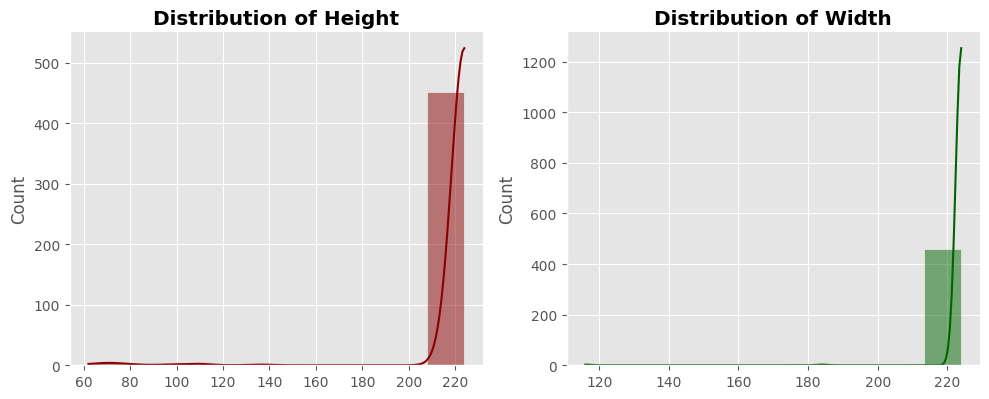

In [134]:
seq_height = []
seq_width = []

for i in TOTAL_IMAGE_PATH_LIST:
    img_BGR = cv2.imread(str(i))
    img_RGB = cv2.cvtColor(img_BGR, cv2.COLOR_BGR2RGB)
    seq_height.append(img_RGB.shape[0])
    seq_width.append(img_RGB.shape[1])

fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (10,4.1))
ax = ax.flat

sns.histplot(seq_height, kde = True, color = 'darkred', ax = ax[0])
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[0].set_title('Distribution of Height', fontweight = 'bold', color = 'black')

sns.histplot(seq_width, kde = True, color = 'darkgreen', ax = ax[1])
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[1].set_title('Distribution of Width', fontweight = 'bold', color = 'black')

fig.tight_layout()
fig.show()

In [135]:
df_height_width = pd.DataFrame({'height':seq_height, 'width':seq_width})

df_height_width.describe().T

count        mean        std    min    25%    50%    75%    max
height  460.0  221.345652  18.914556   62.0  224.0  224.0  224.0  224.0
width   460.0  223.678261   5.365991  116.0  224.0  224.0  224.0  224.0

# **4. Preprocessing**

In [136]:
# Let's create our pd.DataFrame to store the path of the images and their respective label.
img_path_and_label = {'img_path':[],
                      'label':[]}

for img_pth in TOTAL_IMAGE_PATH_LIST:
    img_path_and_label['img_path'].append(img_pth)
    img_path_and_label['label'].append(img_pth.parent.stem)

df_path_and_label = pd.DataFrame(img_path_and_label)
df_path_and_label.head()

img_path                  label
0  /content/SB-FishDisease/SB-FishDisease/Bacteri...  Bacterial Red disease
1  /content/SB-FishDisease/SB-FishDisease/Bacteri...  Bacterial Red disease
2  /content/SB-FishDisease/SB-FishDisease/Bacteri...  Bacterial Red disease
3  /content/SB-FishDisease/SB-FishDisease/Bacteri...  Bacterial Red disease
4  /content/SB-FishDisease/SB-FishDisease/Bacteri...  Bacterial Red disease

In [137]:
# Now we are going to separate the paths of the images and their respective label.
X = df_path_and_label.drop('label', axis = 1)
y = df_path_and_label['label']

# Then, let's split into training and test set.
# But first we define the random seed for reproducibility.
SEED = 42

X_train, X_test, y_train, y_test = tts(X,y, test_size = 0.2, random_state = SEED, stratify = y)

In [138]:
print('Total Images of training set:')
print(Counter(y_train))
print('')

print('Total Images of test set:')
print(Counter(y_test))

Total Images of training set:
Counter({'Healthy Fish': 142, 'Bacterial gill disease': 46, 'Bacterial diseases - Aeromoniasis': 39, 'Bacterial Red disease': 39, 'Fungal diseases Saprolegniasis': 37, 'Viral diseases White tail disease': 35, 'Parasitic diseases': 30})

Total Images of test set:
Counter({'Healthy Fish': 35, 'Bacterial gill disease': 12, 'Bacterial diseases - Aeromoniasis': 10, 'Viral diseases White tail disease': 9, 'Fungal diseases Saprolegniasis': 9, 'Bacterial Red disease': 9, 'Parasitic diseases': 8})


In [139]:
classes

['Bacterial Red disease',
 'Bacterial diseases - Aeromoniasis',
 'Bacterial gill disease',
 'Fungal diseases Saprolegniasis',
 'Healthy Fish',
 'Parasitic diseases',
 'Viral diseases White tail disease']

In [140]:
# Now we have to convert our labels to number, where:
# Bacterial Red disease = 0
# Bacterial diseases - Aeromoniasis = 1
# Bacterial gill disease = 2
# Fungal diseases Saprolegniasis = 3
# Healthy Fish = 4
# Parasitic diseases = 5
# Viral diseases White tail disease = 6

label_map = dict(zip(classes, range(0,7)))

y_train_array = np.array(y_train.map(label_map))
y_train_torch = torch.from_numpy(y_train_array)

y_test_array = np.array(y_test.map(label_map))
y_test_torch = torch.from_numpy(y_test_array)
y_test_torch

tensor([4, 1, 2, 5, 4, 4, 1, 5, 6, 3, 4, 3, 4, 4, 0, 1, 4, 3, 6, 5, 0, 4, 3, 0,
        2, 2, 1, 5, 4, 6, 2, 6, 4, 1, 1, 4, 3, 2, 4, 4, 3, 1, 4, 4, 0, 0, 4, 4,
        5, 0, 2, 4, 2, 2, 4, 1, 6, 4, 4, 1, 4, 4, 3, 5, 0, 6, 3, 4, 6, 4, 4, 4,
        4, 2, 4, 2, 4, 5, 4, 3, 4, 1, 6, 0, 4, 6, 2, 4, 4, 5, 0, 2])

In [141]:
# We define the transformations for our data set.
weights = ResNet50_Weights.DEFAULT
auto_transforms = weights.transforms()
auto_transforms

ImageClassification(
    crop_size=[224]
    resize_size=[232]
    mean=[0.485, 0.456, 0.406]
    std=[0.229, 0.224, 0.225]
    interpolation=InterpolationMode.BILINEAR
)

In [142]:
# We apply the transformations to our data sets.

images_train = [None] * len(X_train)

for i, (_,img_path_train) in enumerate(X_train.iterrows()):
    img_train = Image.open(img_path_train[0]).convert('RGB')
    images_train[i] = auto_transforms(img_train)

images_test = [None] * len(X_test)

for i, (_, img_path_test) in enumerate(X_test.iterrows()):
    img_test = Image.open(img_path_test[0]).convert('RGB')
    images_test[i] = auto_transforms(img_test)

In [143]:
# We will then convert our lists of tensors into a single tensor.
X_train_torch = torch.stack(images_train)
X_test_torch = torch.stack(images_test)

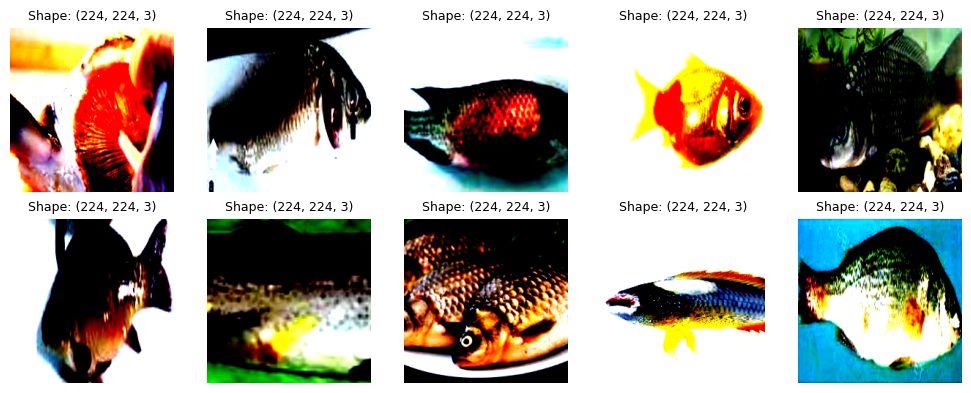

In [144]:
# Let's visualize some randomly selected transformed images.
indices = torch.randperm(10).numpy()

fig, ax = plt.subplots(nrows = 2, ncols = 5, figsize = (10,4))
ax = ax.flat

for i,j in enumerate(indices):
    IMG = X_train_torch[j].permute(1,2,0).numpy()
    ax[i].imshow(IMG)
    ax[i].set_title(f'Shape: {IMG.shape}', fontsize = 9)
    ax[i].axis('off')

fig.tight_layout()
fig.show()

**Now we have to convert our tensors into Datase's and then convert it into DataLoader's.**

In [145]:
# First of all, we convert to Dataset but for this we have to create a Dataset class.
class CustomDataset(Dataset):
    def __init__(self, data, target):
        self.data = data
        self.target = target

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        x = self.data[idx]
        y = self.target[idx]

        return x,y

In [146]:
# Now we convert to Dataset.
train_dataset = CustomDataset(X_train_torch, y_train_torch)
test_dataset = CustomDataset(X_test_torch, y_test_torch)

In [147]:
# Then we convert to DataLoader.
BATCH_SIZE = 16
NUM_WORKERS = os.cpu_count()

train_dataloader = DataLoader(dataset = train_dataset,
                              batch_size = BATCH_SIZE,
                              shuffle = True,
                              num_workers = NUM_WORKERS)

test_dataloader = DataLoader(dataset = test_dataset,
                             batch_size = BATCH_SIZE,
                             shuffle = False,
                             num_workers = NUM_WORKERS)

In [148]:
# Let's visualize a batch.
images_batch, labels_batch = next(iter(train_dataloader))

images_batch.shape, labels_batch.shape

(torch.Size([16, 3, 224, 224]), torch.Size([16]))

# **5. Model**

In [149]:
# GPU
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [183]:
# We define the model to use.
#model = resnet50(weights = weights)

import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torchvision import models
from torch.utils.data import DataLoader
from keras.models import Sequential

num_classes = 7  # Replace with your actual number of classes
# Define your ResNet-50 model
#model = resnet50(weights = weights)
model = models.resnet50(pretrained=True)
model.avgpool = nn.AdaptiveAvgPool2d(1)  # Change to AdaptiveAvgPool2d to ensure fixed output size
#from keras.models import Sequential
#from keras.layers import Dense, Activation

# Experiment with different model architectures
#model = models.resnet34(pretrained=True)  # Try using a simpler model like resnet34
#model.fc = nn.Linear(model.fc.in_features, num_classes)


# Create a Sequential model
#model = Sequential()

# Add layers to the model
#model.add(Dense(units=64, input_dim=100))
#model.add(Activation('relu'))
#model.add(Dense(units=10))
#model.add(Activation('softmax'))


#model.layers[0].trainable = False
num_classes = 7  # Replace with your actual number of classes
model.fc = nn.Linear(model.fc.in_features, num_classes)
#model = nn.Linear(model.in_features, num_classes)
# Add data augmentation to your image transformations
train_transform = transforms.Compose([
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.2),
    transforms.RandomRotation(degrees=30),
    transforms.RandomAffine(degrees=0, translate=(0.1, 0.1)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])



In [184]:
# Now we visualize the architecture of the model.
!pip install torchinfo
from torchinfo import summary
summary(model = model,
        input_size = [4,3,224,224],
        col_names = ['input_size','output_size','num_params','trainable'],
        col_width = 17,
        row_settings = ['var_names'])

Layer (type (var_name))                  Input Shape       Output Shape      Param #           Trainable
ResNet (ResNet)                          [4, 3, 224, 224]  [4, 7]            --                True
├─Conv2d (conv1)                         [4, 3, 224, 224]  [4, 64, 112, 112] 9,408             True
├─BatchNorm2d (bn1)                      [4, 64, 112, 112] [4, 64, 112, 112] 128               True
├─ReLU (relu)                            [4, 64, 112, 112] [4, 64, 112, 112] --                --
├─MaxPool2d (maxpool)                    [4, 64, 112, 112] [4, 64, 56, 56]   --                --
├─Sequential (layer1)                    [4, 64, 56, 56]   [4, 256, 56, 56]  --                True
│    └─Bottleneck (0)                    [4, 64, 56, 56]   [4, 256, 56, 56]  --                True
│    │    └─Conv2d (conv1)               [4, 64, 56, 56]   [4, 64, 56, 56]   4,096             True
│    │    └─BatchNorm2d (bn1)            [4, 64, 56, 56]   [4, 64, 56, 56]   128               True

In [357]:
# Now we freeze the parameters of the extractor layers.
# Add dropout to the fully connected layer
model.fc = nn.Sequential(
    nn.Dropout(0.35),  # Adjust the dropout rate as needed
    nn.Linear(model.fc.in_features, num_classes)
)


In [358]:
# We go back to visualize how it looked after freezing the parameters.
# Now we visualize the architecture of the model.
#!pip install torchinfo
from torchinfo import summary
summary(model = model,
        input_size = [4,3,224,224],
        col_names = ['input_size','output_size','num_params','trainable'],
        col_width = 17,
        row_settings = ['var_names'])


Layer (type (var_name))                  Input Shape       Output Shape      Param #           Trainable
ResNet (ResNet)                          [4, 3, 224, 224]  [4, 7]            --                True
├─Conv2d (conv1)                         [4, 3, 224, 224]  [4, 64, 112, 112] 9,408             True
├─BatchNorm2d (bn1)                      [4, 64, 112, 112] [4, 64, 112, 112] 128               True
├─ReLU (relu)                            [4, 64, 112, 112] [4, 64, 112, 112] --                --
├─MaxPool2d (maxpool)                    [4, 64, 112, 112] [4, 64, 56, 56]   --                --
├─Sequential (layer1)                    [4, 64, 56, 56]   [4, 256, 56, 56]  --                True
│    └─Bottleneck (0)                    [4, 64, 56, 56]   [4, 256, 56, 56]  --                True
│    │    └─Conv2d (conv1)               [4, 64, 56, 56]   [4, 64, 56, 56]   4,096             True
│    │    └─BatchNorm2d (bn1)            [4, 64, 56, 56]   [4, 64, 56, 56]   128               True

In [359]:
# Let's visualize the last layer, which we will modify for our binary classification purpose.
model.fc

Sequential(
  (0): Dropout(p=0.35, inplace=False)
  (1): Linear(in_features=2048, out_features=7, bias=True)
)

In [360]:
# We modify the last layer.
output_shape = len(classes)

model.fc = nn.Linear(in_features = 2048, out_features = output_shape, bias = True)

In [361]:
# We visualize our model again.
summary(model = model,
        input_size = [4,3,224,224],
        col_names = ['input_size','output_size','num_params','trainable'],
        col_width = 17,
        row_settings = ['var_names'])

Layer (type (var_name))                  Input Shape       Output Shape      Param #           Trainable
ResNet (ResNet)                          [4, 3, 224, 224]  [4, 7]            --                True
├─Conv2d (conv1)                         [4, 3, 224, 224]  [4, 64, 112, 112] 9,408             True
├─BatchNorm2d (bn1)                      [4, 64, 112, 112] [4, 64, 112, 112] 128               True
├─ReLU (relu)                            [4, 64, 112, 112] [4, 64, 112, 112] --                --
├─MaxPool2d (maxpool)                    [4, 64, 112, 112] [4, 64, 56, 56]   --                --
├─Sequential (layer1)                    [4, 64, 56, 56]   [4, 256, 56, 56]  --                True
│    └─Bottleneck (0)                    [4, 64, 56, 56]   [4, 256, 56, 56]  --                True
│    │    └─Conv2d (conv1)               [4, 64, 56, 56]   [4, 64, 56, 56]   4,096             True
│    │    └─BatchNorm2d (bn1)            [4, 64, 56, 56]   [4, 64, 56, 56]   128               True

In [362]:
# Now let's visualize one step forward.

pred_logit = model(images_batch.to(device))
pred_logit

tensor([[-0.7105, -0.8517, -0.4146,  3.6489, -1.2607, -0.6005, -0.4419],
        [-0.9305,  3.3945, -0.4499, -0.3107, -1.5368, -0.6280, -0.8804],
        [-0.6249, -0.5725, -0.4585, -0.0159,  2.1865, -0.4858, -0.3937],
        [-0.7811, -0.8657, -0.5205,  4.0616, -1.2271, -0.8249, -0.5960],
        [-0.5800, -0.8149, -0.4096,  3.4619, -0.9024, -0.7524, -0.4098],
        [-0.7975,  3.2295, -0.4509, -0.2290, -1.3575, -0.6810, -0.8113],
        [-0.5724, -0.3857, -0.2593, -0.1174,  1.9991, -0.4206, -0.4576],
        [-0.7512, -0.5895, -0.3547, -0.2905,  2.4965, -0.4444, -0.4982],
        [-0.7102, -0.6875, -0.3958, -0.0452,  2.3706, -0.3971, -0.4949],
        [-0.8274, -0.7271,  3.3895, -0.2913, -1.2633, -0.1309, -0.5795],
        [-0.5880, -0.4329, -0.4620, -0.1364,  2.2055, -0.4263, -0.4525],
        [-0.6142, -0.6625, -0.4435,  3.8825, -1.1779, -0.9599, -0.6218],
        [-0.6564, -0.4392, -0.4377,  0.0059,  2.0937, -0.3362, -0.4808],
        [-0.7162, -0.5648, -0.3075, -0.1775,  2.245

In [363]:
# Let's define our loss function and the optimizer.
loss_fn = nn.CrossEntropyLoss()
#optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
# Use learning rate scheduler
from torch.optim.lr_scheduler import StepLR

optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9, weight_decay=1e-5)
scheduler = StepLR(optimizer, step_size=20, gamma=0.1)
from torch.optim.lr_scheduler import ReduceLROnPlateau

scheduler = ReduceLROnPlateau(optimizer, 'min', patience=5)



**We are going to define 3 functions to execute the training**:

- train_step
- checkpoint
- test_step
- train

In [364]:

def train_step(model:torch.nn.Module,
               dataloader:torch.utils.data.DataLoader,
               loss_fn:torch.nn.Module,
               optimizer:torch.optim.Optimizer):


    model.train()

    train_loss = 0.
    accuracy_train = MulticlassAccuracy(num_classes = len(classes), average = 'macro').to(device)

    for batch,(X,y) in enumerate(dataloader):
        X,y = X.to(device), y.to(device)
        y_pred_logit = model(X)

        loss = loss_fn(y_pred_logit, y)
        train_loss += loss.item()

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        y_pred_prob = torch.softmax(y_pred_logit, dim = 1)
        accuracy_train.update(y_pred_prob, y)

    train_loss = train_loss/len(dataloader)
    train_accuracy = accuracy_train.compute()
    accuracy_train.reset()

    return train_loss, train_accuracy

In [365]:
def save_checkpoint(filename, model, loss, epoch, optimizer):
    state = {'filename':filename,
             'model':model.state_dict(),
             'loss':loss,
             'epoch':epoch,
             'optimizer':optimizer.state_dict()}

    torch.save(state, filename)

In [366]:
def test_step(model:torch.nn.Module,
              dataloader:torch.utils.data.DataLoader,
              loss_fn:torch.nn.Module):


    model.eval()

    test_loss = 0.
    accuracy_test = MulticlassAccuracy(num_classes = len(classes), average = 'macro').to(device)

    with torch.inference_mode():
        for batch,(X,y) in enumerate(dataloader):
            X,y = X.to(device), y.to(device)
            y_pred_logit = model(X)

            loss = loss_fn(y_pred_logit, y)
            test_loss += loss.item()

            y_pred_prob = torch.softmax(y_pred_logit, dim = 1)
            accuracy_test.update(y_pred_prob, y)

    test_loss = test_loss/len(dataloader)
    test_accuracy = accuracy_test.compute()
    accuracy_test.reset()

    return test_loss, test_accuracy

In [367]:
def train(model:torch.nn.Module,
          train_dataloader:torch.utils.data.DataLoader,
          test_dataloader:torch.utils.data.DataLoader,
          loss_fn:torch.nn.Module,
          optimizer:torch.optim.Optimizer,
          epochs:int):

    results = {'train_loss':[],
               'train_accuracy':[],
               'test_loss':[],
               'test_accuracy':[]}

    best_test_loss = float('inf')

    for epoch in tqdm(range(epochs)):
        train_loss, train_accuracy = train_step(model = model,
                                        dataloader = train_dataloader,
                                        loss_fn = loss_fn,
                                        optimizer = optimizer)


        test_loss, test_accuracy = test_step(model = model,
                                     dataloader = test_dataloader,
                                     loss_fn = loss_fn)

        if test_loss < best_test_loss:
            best_test_loss = test_loss

            file_name = 'best_model.pt'

            save_checkpoint(file_name, model, best_test_loss, epoch, optimizer)

        print(f'Epoch: {epoch + 1} | ',
              f'Train Loss: {train_loss:.4f} | ',
              f'Train Accuracy: {train_accuracy:.4f} | ',
              f'Test Loss: {test_loss:.4f} | ',
              f'Test Accuracy: {test_accuracy:.4f}')

        results['train_loss'].append(train_loss)
        results['train_accuracy'].append(train_accuracy)
        results['test_loss'].append(test_loss)
        results['test_accuracy'].append(test_accuracy)

    return results

In [368]:
# Training !!

torch.manual_seed(SEED)
torch.cuda.manual_seed(SEED)

EPOCHS = 100

MODEL_RESULTS = train(model.to(device),
                      train_dataloader,
                      test_dataloader,
                      loss_fn,
                      optimizer,
                      EPOCHS)

  0%|          | 0/100 [00:00<?, ?it/s]

Epoch: 1 |  Train Loss: 0.2238 |  Train Accuracy: 1.0000 |  Test Loss: 0.5518 |  Test Accuracy: 0.7040
Epoch: 2 |  Train Loss: 0.1080 |  Train Accuracy: 0.9899 |  Test Loss: 0.5416 |  Test Accuracy: 0.7159
Epoch: 3 |  Train Loss: 0.0581 |  Train Accuracy: 1.0000 |  Test Loss: 0.5416 |  Test Accuracy: 0.7000
Epoch: 4 |  Train Loss: 0.0586 |  Train Accuracy: 0.9938 |  Test Loss: 0.5546 |  Test Accuracy: 0.7159
Epoch: 5 |  Train Loss: 0.0518 |  Train Accuracy: 0.9952 |  Test Loss: 0.5690 |  Test Accuracy: 0.6881
Epoch: 6 |  Train Loss: 0.0364 |  Train Accuracy: 0.9952 |  Test Loss: 0.5711 |  Test Accuracy: 0.6881
Epoch: 7 |  Train Loss: 0.0467 |  Train Accuracy: 0.9930 |  Test Loss: 0.5572 |  Test Accuracy: 0.7040
Epoch: 8 |  Train Loss: 0.0238 |  Train Accuracy: 1.0000 |  Test Loss: 0.5470 |  Test Accuracy: 0.7040
Epoch: 9 |  Train Loss: 0.0343 |  Train Accuracy: 0.9890 |  Test Loss: 0.5916 |  Test Accuracy: 0.7000
Epoch: 10 |  Train Loss: 0.0260 |  Train Accuracy: 0.9961 |  Test Loss: 0

In [369]:
# Function to plot the loss and metric during each training epoch.
def plot_loss_metric_curve(model_results:Dict[str,List[float]]):

    train_loss = model_results["train_loss"]
    test_loss = model_results["test_loss"]

    train_accuracy = [float(value) for value in model_results["train_accuracy"]]
    test_accuracy = [float(value) for value in model_results["test_accuracy"]]

    fig,axes = plt.subplots(nrows = 1, ncols = 2, figsize = (10,4))
    plt.style.use("ggplot")
    axes = axes.flat

    axes[0].plot(train_loss, color = "red", label = "Train")
    axes[0].plot(test_loss, color = "blue", label = "Test")
    axes[0].set_title("CrossEntropyLoss", fontsize = 12, fontweight = "bold", color = "black")
    axes[0].set_xlabel("Epochs", fontsize = 10, fontweight = "bold", color = "black")
    axes[0].set_ylabel("Loss", fontsize = 10, fontweight = "bold", color = "black")
    axes[0].legend()

    axes[1].plot(train_accuracy, color = "red", label = "Train")
    axes[1].plot(test_accuracy, color = "blue", label = "Test")
    axes[1].set_title("Metric of performance: Accuracy", fontsize = 12, fontweight = "bold", color = "black")
    axes[1].set_xlabel("Epochs", fontsize = 10, fontweight = "bold", color = "black")
    axes[1].set_ylabel("Score", fontsize = 10, fontweight = "bold", color = "black")
    axes[1].legend()

    fig.tight_layout()
    fig.show()

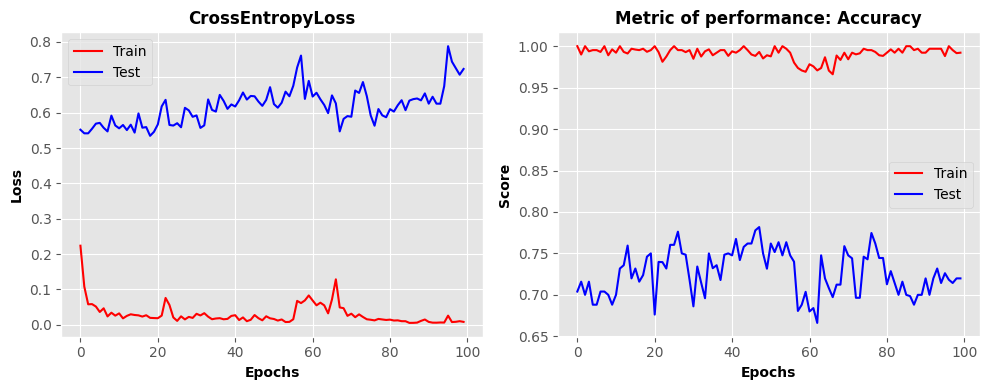

In [370]:
plot_loss_metric_curve(MODEL_RESULTS)

In [371]:
# We load the best model.
import torch
path_checkpoint = "/content/best_model.pt"
!ls {path_checkpoint}
#checkpoint = torch.load(path_checkpoint, map_location=torch.device('cpu'))
checkpoint = torch.load(path_checkpoint)

/content/best_model.pt


In [372]:
# The best model gave us:

print(f'Best test loss = {checkpoint["loss"]}')
print(f'Epoch = {checkpoint["epoch"]+1}')

Best test loss = 0.5345777745048205
Epoch = 19


**Predictions**

In [381]:
import torch
from torchvision import models

# Define the device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Load the pre-trained ResNet50 model
model = models.resnet50(pretrained=True)


model.to(device)
# Print the shapes of the parameters in the checkpoint
print(checkpoint["model"]["fc.weight"].shape)
print(checkpoint["model"]["fc.bias"].shape)

# Print the shapes of the parameters in the model
print(model.fc.weight.shape)
print(model.fc.bias.shape)

# Change the output dimension of the fc layer to 7
model.fc = torch.nn.Linear(model.fc.in_features, 7)
model.load_state_dict(checkpoint["model"])


print(f"Model device: {next(model.parameters()).device}")
print(f"X_train_torch device: {X_train_torch.device}")

model.eval()

# Move the model to the appropriate device
model = model.to('cuda:0')

# Move the input tensors to the same device as the model
X_train_torch = X_train_torch.to('cuda:0')
X_test_torch = X_test_torch.to('cuda:0')
with torch.no_grad():
    y_pred_logits_train = model(X_train_torch)
    y_pred_logits_test = model(X_test_torch)



torch.Size([7, 2048])
torch.Size([7])
torch.Size([1000, 2048])
torch.Size([1000])
Model device: cuda:0
X_train_torch device: cuda:0


OutOfMemoryError: CUDA out of memory. Tried to allocate 1.10 GiB. GPU 0 has a total capacty of 14.75 GiB of which 941.06 MiB is free. Process 1971 has 13.83 GiB memory in use. Of the allocated memory 11.67 GiB is allocated by PyTorch, and 2.00 GiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF

In [ ]:
y_pred_prob_train = torch.softmax(y_pred_logits_train, dim = 1).cpu()
y_pred_class_train = torch.argmax(y_pred_prob_train, dim = 1).numpy().astype(int)

y_pred_prob_test = torch.softmax(y_pred_logits_test, dim = 1).cpu()
y_pred_class_test = torch.argmax(y_pred_prob_test, dim = 1).numpy().astype(int)

# **6. Metrics**

**Confusion Matrix**

In [ ]:
cf_mx_train = confusion_matrix(y_train_array.astype(int), y_pred_class_train)
cf_mx_test = confusion_matrix(y_test_array.astype(int), y_pred_class_test)

In [ ]:
# Confusion Matrix Plot
fig,ax = plt.subplots(nrows = 1, ncols = 2, figsize = (20,8))
ax = ax.flat
sns.heatmap(cf_mx_train,
            cmap = 'Blues',
            annot = True,
            fmt = ' ',
            annot_kws = {"fontsize":10,
                         "fontweight":"bold"},
            linewidths = 1,
            linecolor = "white",
            cbar = False,
            square = True,
            xticklabels = classes,
            yticklabels = classes,
            ax = ax[0])
ax[0].set_title('Confusion Matrix Train', fontsize = 12, fontweight = 'bold', color = 'black')

sns.heatmap(cf_mx_test,
            cmap = 'Reds',
            annot = True,
            fmt = ' ',
            annot_kws = {"fontsize":10,
                         "fontweight":"bold"},
            linewidths = 1,
            linecolor = "white",
            cbar = False,
            square = True,
            xticklabels = classes,
            yticklabels = classes,
            ax = ax[1])
ax[1].set_title('Confusion Matrix Test', fontsize = 12, fontweight = 'bold', color = 'black')

fig.tight_layout()
fig.show()

**Accuray score**

In [ ]:
print(f'Accuracy train = {accuracy_score(y_train_array.astype(int), y_pred_class_train)}')

print(f'Accuracy test = {accuracy_score(y_test_array.astype(int), y_pred_class_test)}')

**Classification Report**

In [ ]:
# To perform a reverse mapping, go from id to label.
id2label = dict(zip(range(0,7),classes))
id2label

In [ ]:
print("=="*40)
print(" " * 25, "Classification Report Train")
print("=="*40)
print(classification_report(pd.Series(y_train_array).map(id2label),
                            pd.Series(y_pred_class_train).map(id2label),))

print("=="*40)
print(" " * 25, "Classification Report Test")
print("=="*40)
print(classification_report(pd.Series(y_test_array).map(id2label),
                            pd.Series(y_pred_class_test).map(id2label)))